In [318]:
import numpy as np
import math
import control as ct
import matplotlib.pyplot as plt

In [319]:
# Define Phi Matrix
Phi = np.matrix([[0, 1], [-0.1, 0.01]])
#check eigenvalues
e  = np.linalg.eig(Phi)
# print them 
print(e.eigenvalues)
#print their length (all of them should be smaller than 1.0!
print(np.abs(e.eigenvalues))



[0.005+0.31618824j 0.005-0.31618824j]
[0.31622777 0.31622777]


In [320]:
#Define process noise
Q = np.matrix([[0, 0], [0, .1]])
# Solve Lyapunov Equation (https://en.wikipedia.org/wiki/Lyapunov_equation)
P = ct.dlyap(Phi, Q) 
print(P)

[[0.10101845 0.00091835]
 [0.00091835 0.10101845]]


In [321]:
# Now check for steady state of KF

In [322]:
from scipy import linalg as la

In [340]:
# Assume 1D integrated Random Walk
Phi = np.matrix([[1, 1], [0, 1]])
Q = 0.01*np.matrix([[1/3.0, 1/2.0], [1/2.0, 1.0]])
H =  np.matrix([1.0 , 0.0])
R = np.matrix([1.0])

# Solve time-discrete Riccati equation (https://en.wikipedia.org/wiki/Algebraic_Riccati_equation)
# the solution provides the predicted (!) covariance
P_ = la.solve_discrete_are(Phi.T, H.T, Q, R)
print (P_)


[[0.56394583 0.12505782]
 [0.12505782 0.05009481]]


In [342]:
# compute the steady state Kalman gain
K = P_ @ H.T @ np.linalg.inv(H @ P_ @ H.T + R)

# compute the steady state observed covariance
P0 = (np.eye(2) - K @ H) @ P_
print (P0)

#plot formal error of first state
sigma0 = np.sqrt(P0[0,0])
sigma0_ = np.sqrt(P_[0,0])

[[0.36059166 0.07996301]
 [0.07996301 0.04009481]]


In [333]:
# compare against numerical example

P  =  np.matrix([[0, 0], [0, 0]])
# number of steps
N=30
t=np.arange(1,N+1)
sigmas=np.zeros(N)
sigmas_=np.zeros(N)
for i in np.arange(1,N+1,1):
    P_ = Phi @ P @ Phi.T + Q 
    K = P_ @ H.T @ np.linalg.inv(H @ P_ @ H.T + R)
    P = (np.eye(2) - K @ H) @ P_
    sigmas[i-1] = np.sqrt(P[0,0])
    sigmas_[i-1] = np.sqrt(P_[0,0])

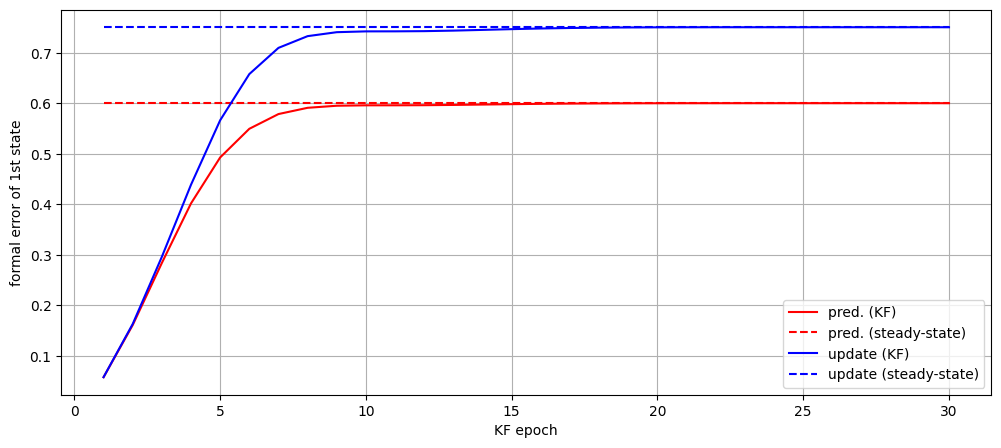

In [343]:
sigmas0 = sigma0 * np.ones(N)
sigmas0_ = sigma0_ * np.ones(N)

plt.figure(1,figsize=(12, 5))  
plt.plot(t,sigmas,'r-',label="pred. (KF)")
plt.plot(t,sigmas0,'r--',label="pred. (steady-state)")
plt.plot(t,sigmas_,'b-',label="update (KF)")
plt.plot(t,sigmas0_,'b--',label="update (steady-state)" )
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("KF epoch")
plt.ylabel("formal error of 1st state")
plt.show()